1. satisfaction_level - Job satisfaction level

2. Last_evaluation - Time since the last performance evaluation in years

3. number_projects - Number of projects completed during employment

4. average_monthly_hours - Average number of hours worked per month

5. time_spend_company - Years of service in the company

6. work_accident - Whether workplace accidents occurred with the employee

7. left - Whether the employee resigned

8. promotion_last_5years - Whether the employee was promoted in the last five years

9. department - Department in which the employee works

10. salary - Relative salary level

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import missingno as msno
from scipy.stats import mannwhitneyu

### Load the file HR.csv into a pandas dataframe

In [2]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Calculate basic statistics for the variables (mean, median, mode, min/max, standard deviation)

In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
len(data)

14999

In [ ]:
data = data.drop_duplicates()
len(data)

11991

I will drop all duplicates since I find it unlikely that there could be two individuals with identical indicators; in my opinion, the data is duplicated.

/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


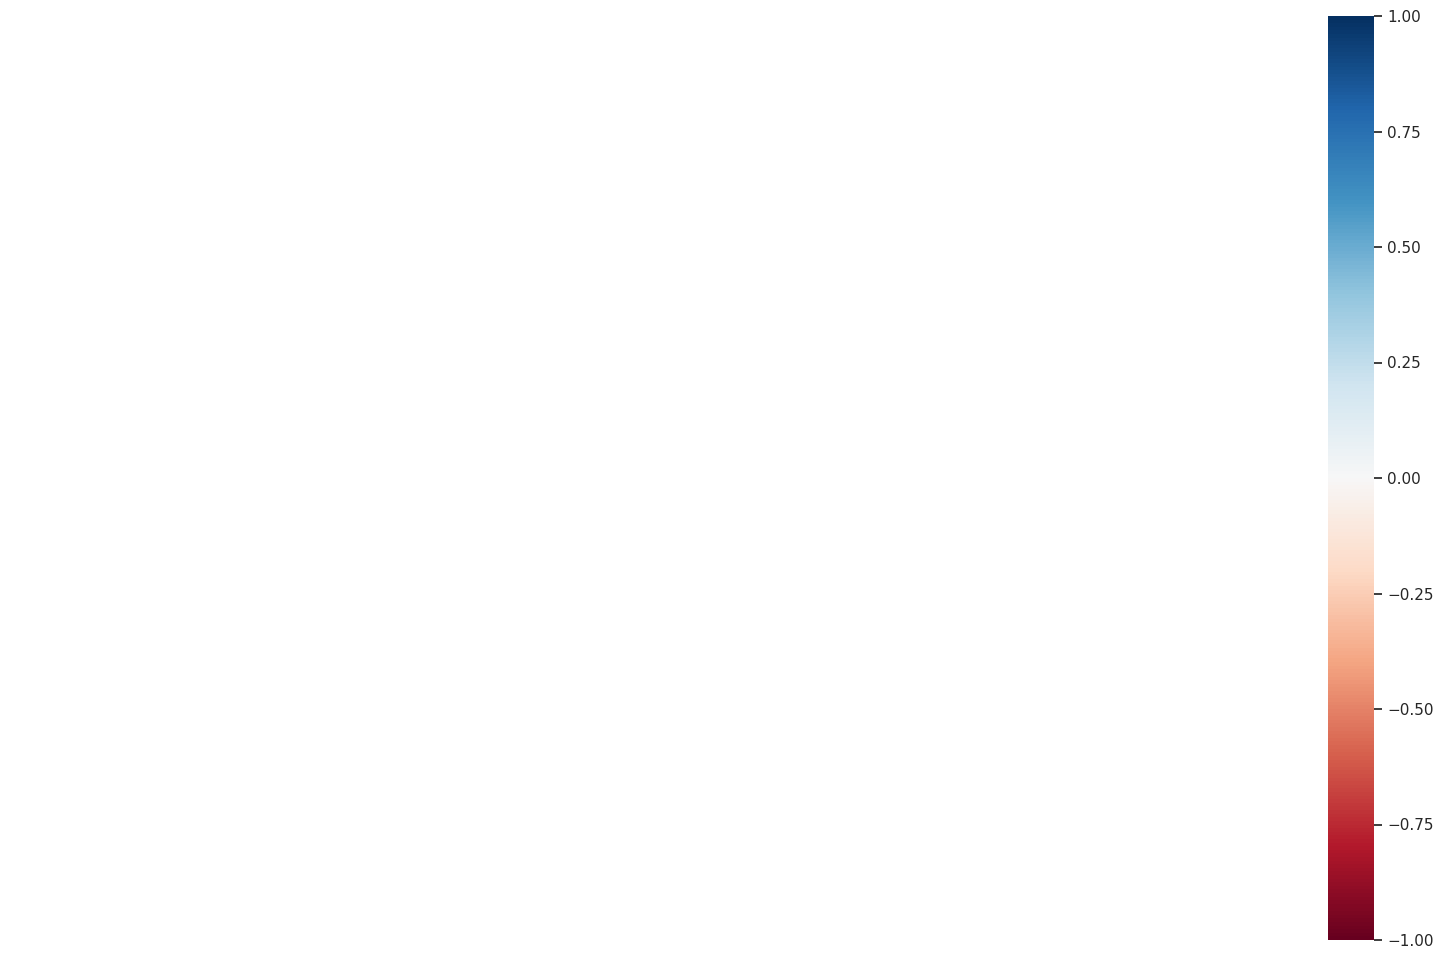

In [ ]:
msno.heatmap(data)
plt.show()

There are no missing values in the dataset.

### Calculate and visualize the correlation matrix for quantitative variables. Identify the two most correlated and two least correlated variables

In [ ]:
correl = data[['satisfaction_level', 'last_evaluation', 'number_project',\
               'average_montly_hours', 'time_spend_company']].corr(method='spearman')

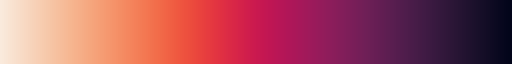

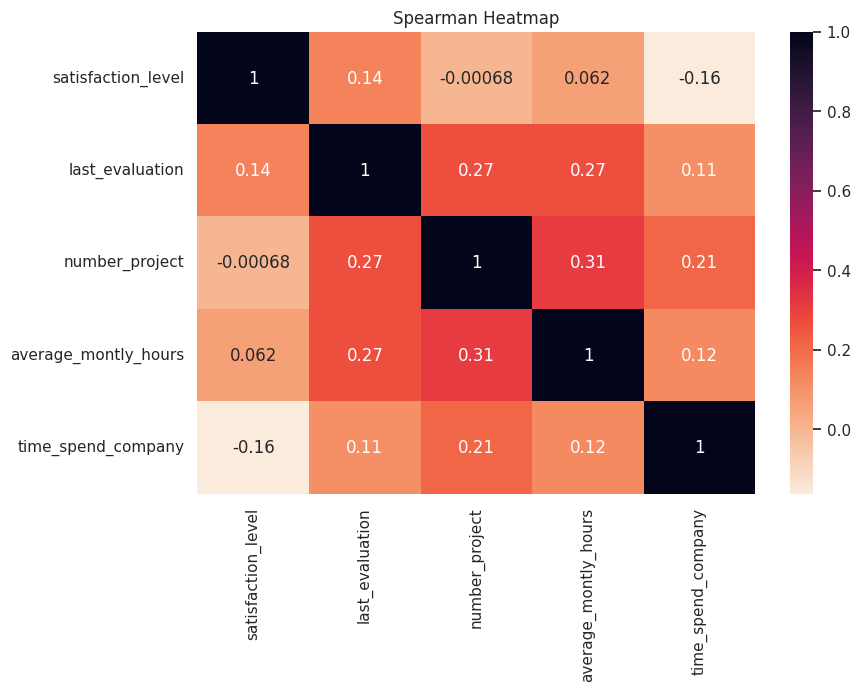

In [ ]:
sns.set(rc={'figure.figsize':(9,6)})
sns.heatmap(correl, annot=True, cmap = "rocket_r").set(title='Spearman Heatmap')
sns.color_palette("rocket_r", as_cmap=True)


Most correlated:

A good correlation with a value of 0.31 is observed between the number of projects and the average number of hours worked.

The second most significant correlation is observed between the number of projects and the time since the last evaluation in years, with a value of 0.27.

Two least correlated:

At the bottom of the list are job satisfaction and the time spent in the company, with a value of -0.16.

Closer to zero, we have the number of projects and job satisfaction, with a value of -0.00068.

### Calculate how many employees work in each department.

In [ ]:
group = data[['department', 'salary']].groupby('department').count()
group = group.rename(columns={'salary': 'employee_count'})
group.sort_values(by=['employee_count'], ascending=False)

,employee_count
department,
sales,3239
technical,2244
support,1821
IT,976
RandD,694
product_mng,686
marketing,673
accounting,621
hr,601


There are a total of 10 departments. In the Sales department, 3239 people work, in the Technical department - 2244, in Support - 1821, in IT - 976, in R&D - 694, and so on.

### Show the distribution of employees by salaries.

(array([5740., 5261.,  990.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

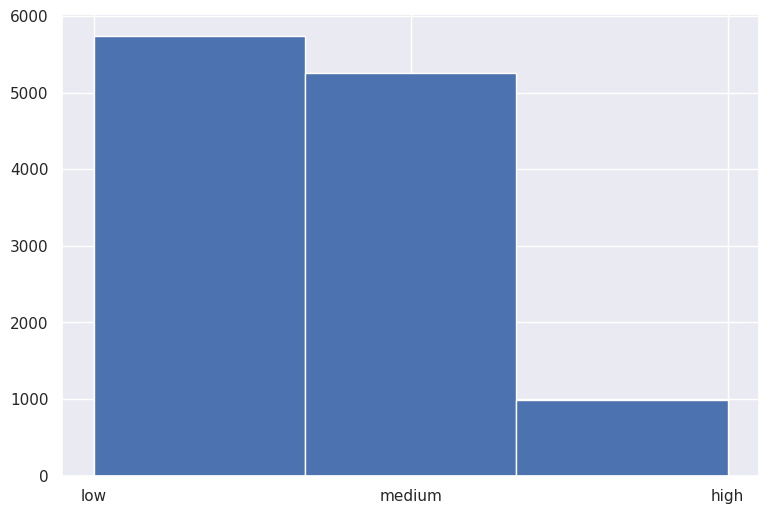

In [ ]:
plt.hist(data.salary, bins = 3)

The distribution of salaries is challenging to characterize as normal.

### Show the distribution of employees by salaries in each department separately

In [ ]:
refdata = data
refdata = refdata.replace({'salary' :{'low' : 0, 'medium' : 1, 'high' : 2}})

([<matplotlib.axis.XTick at 0x7f7623f3d2b0>,
 [Text(0, 0, 'low'), Text(1, 0, 'medium'), Text(2, 0, 'high')])

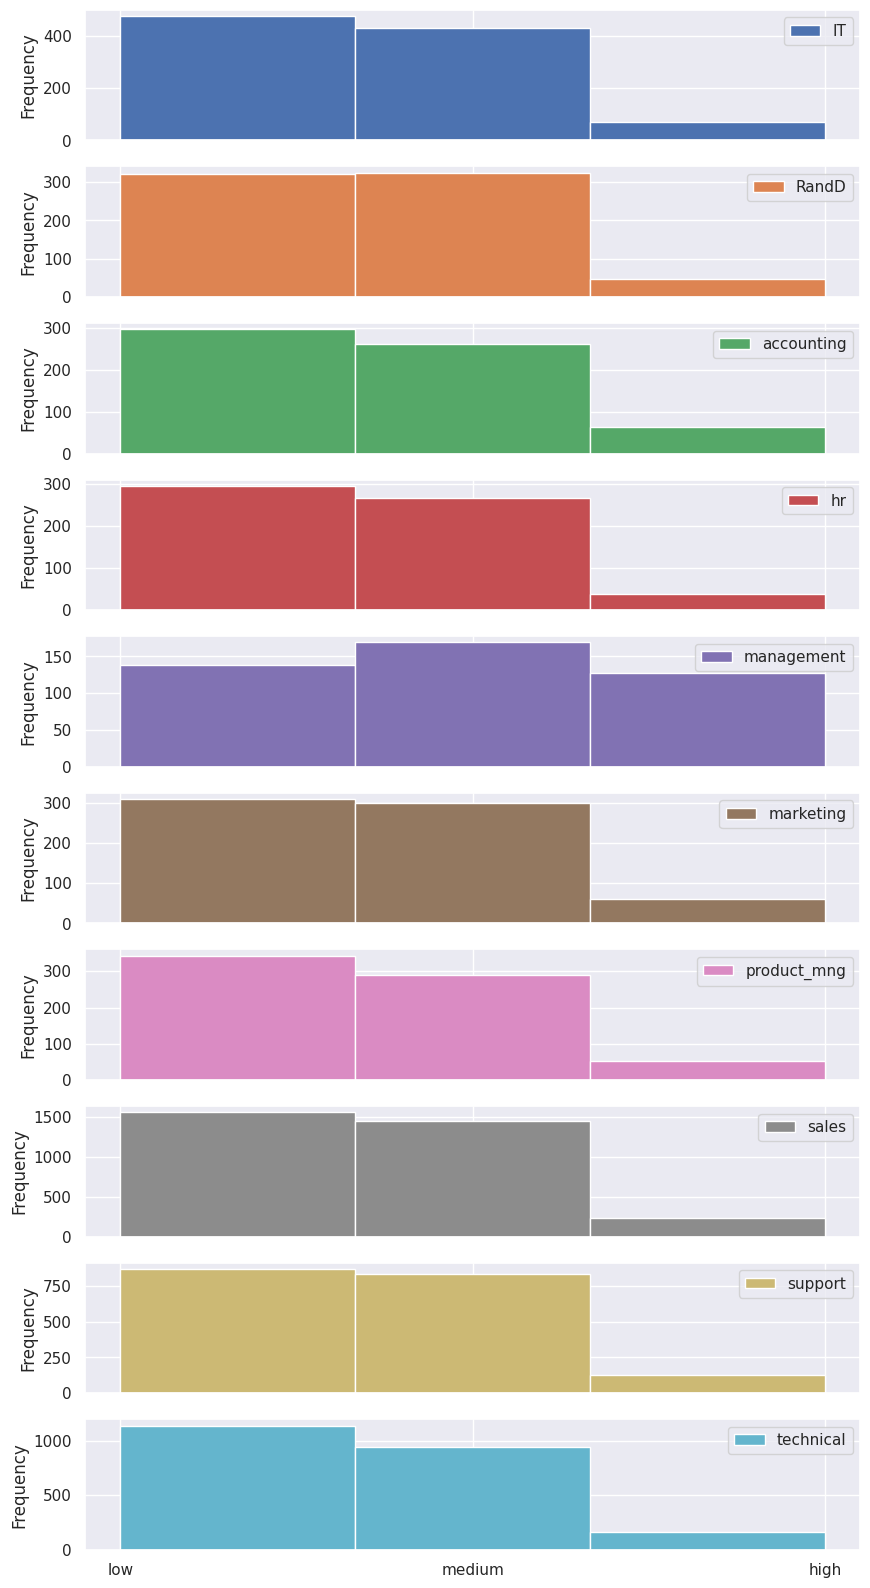

In [ ]:
labels = ['low', 'medium', 'high']
refdata.pivot(columns='department', values='salary').plot(kind='hist',\
subplots=True, rwidth=2, figsize=(10, 20), bins=3, align='mid')
plt.xticks(range(3), labels = labels)

A distribution close to normal can be observed in the Management department, while other departments have indicators close to the overall distribution

### Test the hypothesis that employees with a high salary spend more time at work than employees with a low salary

H0 = Employees with a high salary spend the same amount of time at work as employees with a low salary.

H1 = The samples are different, and one of the groups spends more time at work.

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
high = data.loc[data.salary == 'high']
high = high[['salary', 'average_montly_hours']]
high.head()

,salary,average_montly_hours
72,high,149
111,high,289
189,high,156
267,high,129
306,high,149


In [ ]:
len(high)

990

array([[<Axes: title={'center': 'average_montly_hours'}>]], dtype=object)

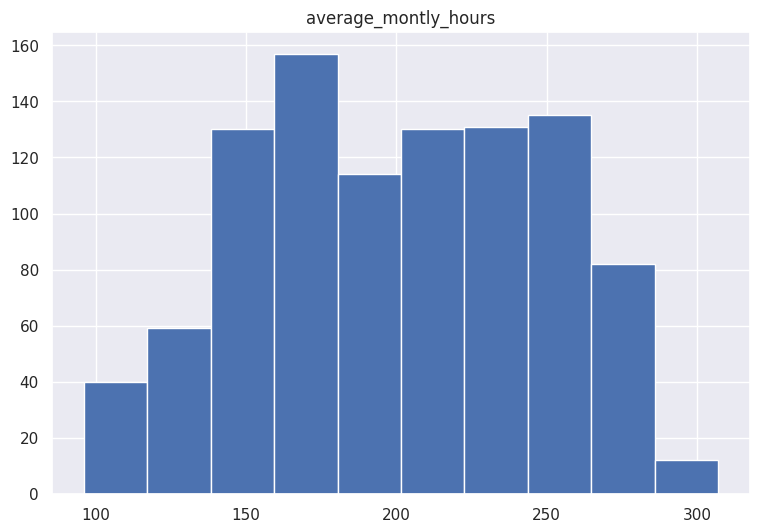

In [ ]:
high_hist = high.hist()
high_hist

In [ ]:
low = data.loc[data.salary == 'low']
low = low[['salary', 'average_montly_hours']]
#low = low.sample(n = len(high))
low.head()

,salary,average_montly_hours
0,low,157
3,low,223
4,low,159
5,low,153
6,low,247


In [ ]:
len(low)

5740

array([[<Axes: title={'center': 'average_montly_hours'}>]], dtype=object)

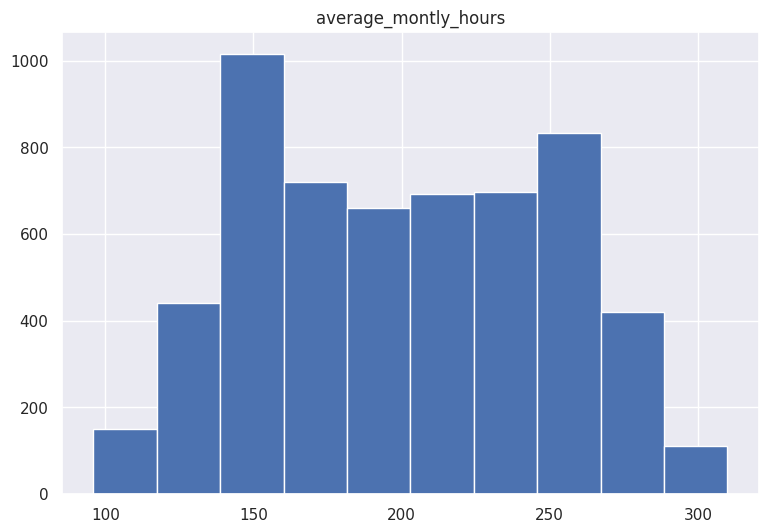

In [ ]:
low_hist = low.hist()
low_hist

The distribution for the two groups is not entirely normal. Additionally, considering that we have quantitative data, it means we will use the Wilcoxon-Mann-Whitney test.

In [ ]:
stat, p_value = mannwhitneyu(high.average_montly_hours, low.average_montly_hours)

print(f"Статистика = {stat:.5f}, p = {p_value:.10f}")
if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 2848437.00000, p = 0.8994097526
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


The Mann-Whitney test results indicate that there are no statistically significant differences in the time spent at work between employees with high and low salaries. In other words, we cannot say that one of the groups spends more time at work than the other.

### Calculate the following indicators among resigned and non-resigned employees (separately):

**● Percentage of employees with promotions in the last 5 years**

**● Average satisfaction level**

**● Average number of projects**

##### For resigned employees:

In [ ]:
left = data.loc[data.left == 1]
left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


The percentage of resigned employees with promotions in the last 5 years:

In [ ]:
sum(left.promotion_last_5years) / len(left.promotion_last_5years)

0.004018081366147665

The average satisfaction level:

In [ ]:
np.mean(left.satisfaction_level)

0.440271220492215

The average number of projects:

In [ ]:
np.mean(left.number_project)

3.8834756403817177

##### For non-resigned employees:

In [ ]:
stayed = data.loc[data.left == 0]
stayed.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


The percentage of current employees with promotions in the last 5 years:

In [ ]:
sum(stayed.promotion_last_5years) / len(stayed.promotion_last_5years)

0.0195

The average satisfaction level:

In [ ]:
np.mean(stayed.satisfaction_level)

0.667365

The average number of projects:

In [ ]:
np.mean(stayed.number_project)

3.7868

### Split the data into a testing and training sample. Build an LDA model predicting whether an employee resigned based on available factors (excluding department and salary). Evaluate the model's quality on the testing sample.

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
forlda = data.iloc[: , :8]
forlda = forlda.drop(columns='left')
forlda.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


I am splitting the dataset into the training and testing samples:

In [15]:
from sklearn.model_selection import train_test_split
data_class = data.left
X_train, X_test, y_train, y_test = train_test_split(forlda, data_class, random_state=51)

In [10]:
data_class

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

I am training the model:

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [20]:
pred_d = lda.predict(X_train)
pred = lda.predict(X_test)
pred = pd.DataFrame(pred)
pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [22]:
accuracy_score(y_train, pred_d)

0.7636234331940617

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7610666666666667


As a result, we have a model with accuracy levels of 0.76 on both the training and testing samples. With this model, though not with the highest accuracy, we can predict whether an employee has resigned or is still in the company.